# Popoluation dynamics of a modified Lotka-Volterra model

\begin{align}
\dot{X} &= X(1-X) - Y \frac{\alpha_{X} X}{1+\beta_{X} X} \\
\dot{Y} &= Y \frac{\alpha_{X} X}{1+\beta_{X} X} -Z \frac{\alpha_{Y} Y}{1+\beta_{Y} Y} -\omega_Y Y \\
\dot{Z} &= Z \frac{\alpha_{Y} Y}{1+\beta_{Y} Y} -\omega_Z Z
\end{align}


In this model we see that the term $X(1-X)$ describes the logistical growth of the prey species **X**. The terms $Y \frac{\alpha_{X} X}{1+\beta_{X} X}$ are part of the modified Lotka-Volterra model, with $\frac{\alpha_{X} X}{1+\beta_{X} X}$ being the functional response of second order. This terms desribes the fact, that a predator cannot consume and hunt at the same time. Therefore a limit  is instantiated by this term. The terms correlating to $\omega$ are the constant death rates of the predators in this model.

(0.0, 1000.0)

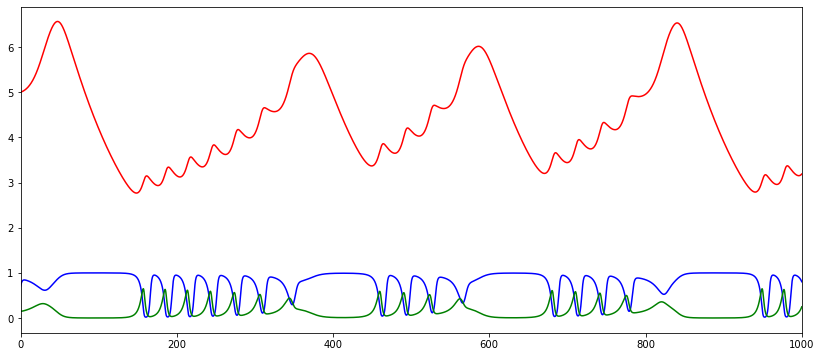

In [24]:
import numpy as np 
import scipy.integrate as sc
import matplotlib.pyplot as plt

class model():
    def __init__(self,parameters,initial_values,t_max ,int_error, max_step):
        self.parameters = parameters
        self.initial_values =initial_values
        self.int_error =int_error
        self.t_max = t_max 
        self.max_step = max_step
        self.X = 0
        self.Y = 0
        self.Z = 0
    
    def __ODE(self,t,y):
        return [y[0]*(1-y[0]) - y[1]*(self.parameters['alpha_A']*y[0]/(1+self.parameters['beta_A']*y[0])),
                y[1]*(self.parameters['alpha_A']*y[0]/(1+self.parameters['beta_A']*y[0])) - y[2]*(self.parameters['alpha_B']*y[1])/(1+y[1]*self.parameters['beta_B'])- self.parameters['omega_B']*y[1],
                y[2]*(self.parameters['alpha_B']*y[1])/(1+y[1]*self.parameters['beta_B']) -self.parameters['omega_C']*y[2]
                ]
    def calc(self):
        solution = sc.solve_ivp(self.__ODE, [0,self.t_max], self.initial_values,max_step=self.max_step , rtol = self.int_error)
        self.X, self.Y, self.Z = solution.y
        self.time = solution.t

#part b        
initial_conditions_b =[0.7,0.15,5]
parameters = {'alpha_A' : 5.0 , 'alpha_B' : 0.1 , 'beta_A' : 5.0, 'beta_B' : 2.0, 'omega_B' : 0.4, 'omega_C' : 0.01}
ec_model = model(parameters,initial_conditions_b, 1000, 10**(-6),max_step = 0.1)
ec_model.calc()

plt.rcParams['figure.figsize'] = [14, 6]
fig_b, axarr_b = plt.subplots()
axarr_b.plot(ec_model.time,ec_model.X,'-b')
axarr_b.plot(ec_model.time,ec_model.Y,'-g')
axarr_b.plot(ec_model.time,ec_model.Z,'-r')
axarr_b.set_xlim(0,1000)


# qualitative analysis of the model
In our simulation run, we see oscillative behaviour, the predator-prey species $Y$ is periodically nearly eliminated, this forces the population of $Z$ to fall due to shortage in food, and allows the prey species $X$ to reach its maxmimum population, where it stays constant until the cycle continues. The oscillation in this model are present due to the Lotka-Voltera model terms, which shows similiar behaviour.

# Comparison of different starting conditions

(0.0, 1000.0)

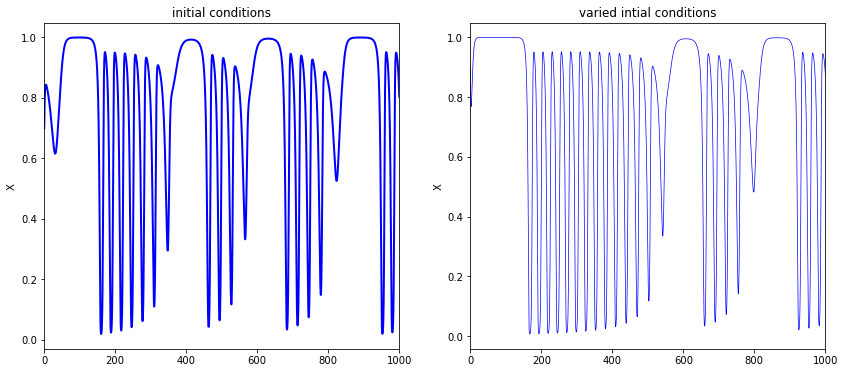

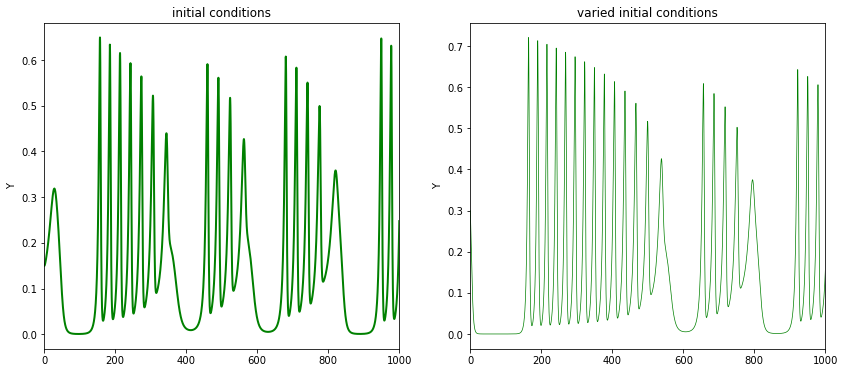

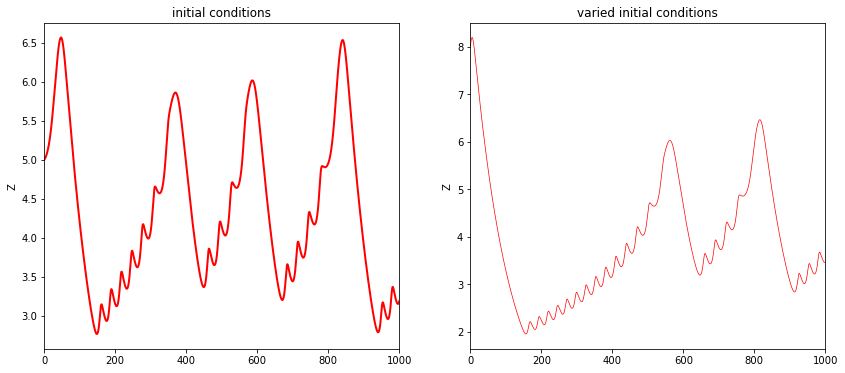

In [29]:
#part c
initial_conditions_c = [0.9,0.3,8]
ec_model_c = model(parameters,initial_conditions_c, 1000, 10**(-6),max_step = 0.1)
ec_model_c.calc()

plt.rcParams['figure.figsize'] = [14, 6]
fig_c_1, axarr_c_1 = plt.subplots(1,2)
axarr_c_1[0].plot(ec_model.time,ec_model.X,'-b',linewidth=2,label = 'X from a' )
axarr_c_1[0].set_title('initial conditions')
axarr_c_1[0].set_ylabel('X')
axarr_c_1[0].set_xlim(0,1000)
axarr_c_1[1].plot(ec_model_c.time,ec_model_c.X,'-b',linewidth=0.7,label = 'X from b')
axarr_c_1[1].set_title('varied intial conditions')
axarr_c_1[1].set_ylabel('X')
axarr_c_1[1].set_xlim(0,1000)

fig_c_2,axarr_c_2 = plt.subplots(1,2)
axarr_c_2[0].plot(ec_model.time,ec_model.Y,'-g',linewidth=2,label='Y from a')
axarr_c_2[0].set_title('initial conditions')
axarr_c_2[0].set_ylabel('Y')
axarr_c_2[0].set_xlim(0,1000)
axarr_c_2[1].plot(ec_model_c.time,ec_model_c.Y,'-g',linewidth=0.7, label= 'Y from b')
axarr_c_2[1].set_title('varied initial conditions')
axarr_c_2[1].set_ylabel('Y')
axarr_c_2[1].set_xlim(0,1000)


fig_c_3,axarr_c_3 = plt.subplots(1,2)
axarr_c_3[0].plot(ec_model.time,ec_model.Z,'-r',linewidth=2, label = 'Z from a')
axarr_c_3[0].set_title('initial conditions')
axarr_c_3[0].set_ylabel('Z')
axarr_c_3[0].set_xlim(0,1000)
axarr_c_3[1].plot(ec_model_c.time,ec_model_c.Z,'-r',linewidth=0.7, label = 'Z from b')
axarr_c_3[1].set_title('varied initial conditions')
axarr_c_3[1].set_ylabel('Z')
axarr_c_3[1].set_xlim(0,1000)



Variying the initial conditions allows to observe how the trajectories of move closer to the observed limit cycle, found with our initial conditions. This can be seen by the seemingly similiarity in the curves with a decaying phase of smaller oscillations.

# Analyzing the Lyapunoff coefficients of the system

To analyze the Lyapunoff coefficients of the system, we take a look at the distance between our trajectories observed in the previous part. This allows to numerically calculate the lyapunoff function and thereby perform regressions over characteristic functions of our distance function.

[ 1.37280055e-02 -2.09029052e+01]


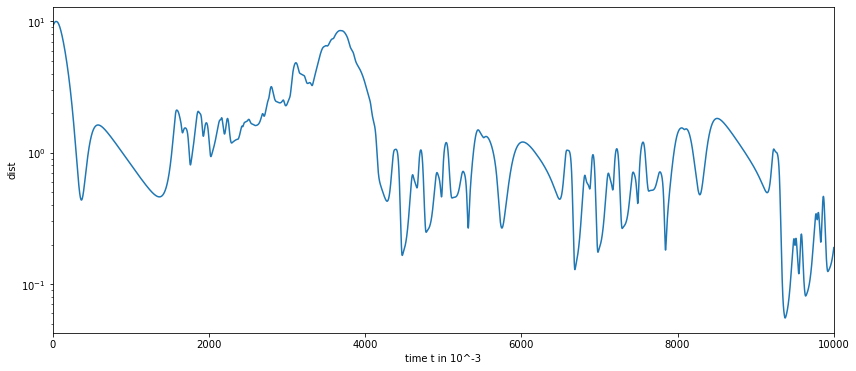

In [32]:
#part d
dist = []
for i in range(len(ec_model.X)):
    dist.append(np.sqrt((ec_model_c.X[i]-ec_model.X[i])**2 + (ec_model_c.Y[i]-ec_model.Y[i])**2) + (ec_model_c.Z[i]-ec_model.Z[i])**2)
    
fig_d ,axarr_d = plt.subplots()
axarr_d.plot([i for i in range(len(dist))] , dist)
axarr_d.set_ylabel('dist')
axarr_d.set_yscale('log')
axarr_d.set_xlabel('time t in 10^-3')
axarr_d.set_xlim([0,len(dist)])
fig_d.show
    
log_dist = np.log(np.array(dist))
t_d = [i for i in range(len(dist))]
regression_d = np.polyfit(t_d[1500:1570],log_dist[1500:1570],1)
print(regression_d)


In our distance Graph, we see phases of exponential growth/decay followed by times of oscillations, forcing the distance to grow, just to then fall again. This forces the two trajectories to move closer together. We further see reoccuring structures present at times $(370,1600),(5750,6580),(8280, 9200)$. 
The biggest lyapunov coefficient can be found on the intervall $(1500,1570)$.
# Findin the second largest lyapunoff coefficient of the system
Here we take a look at the intervall $(390,450)$ and find the second largest lyapunov coefficient:

In [33]:
#part e
regression_e = np.polyfit(t_d[390:450],log_dist[390:450],1)
print(regression_e)

[ 0.01156865 -5.25034313]


# Influence of the integration method on the results
As this is a non-linear system of equation, in other words it is a chaotic system, we expect a change in results due to a change in the integration step. As for chaotic systems, even a small change can results in a suprising large change of results. 

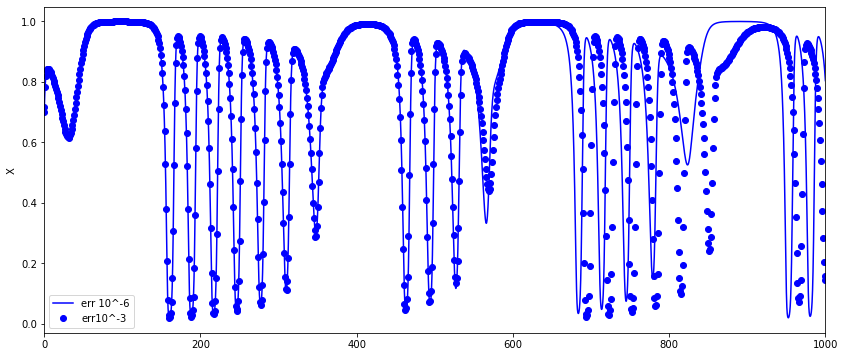

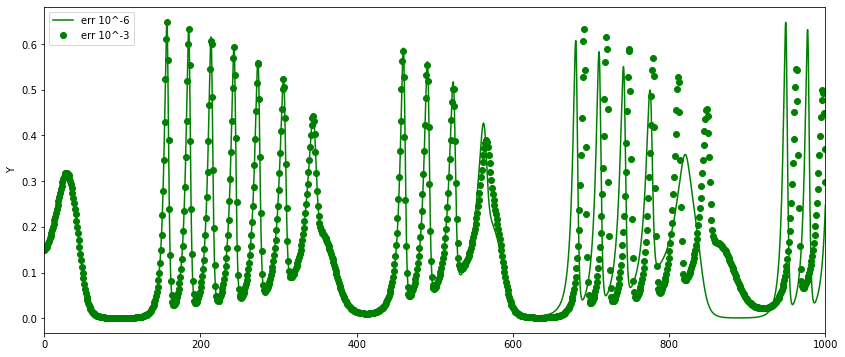

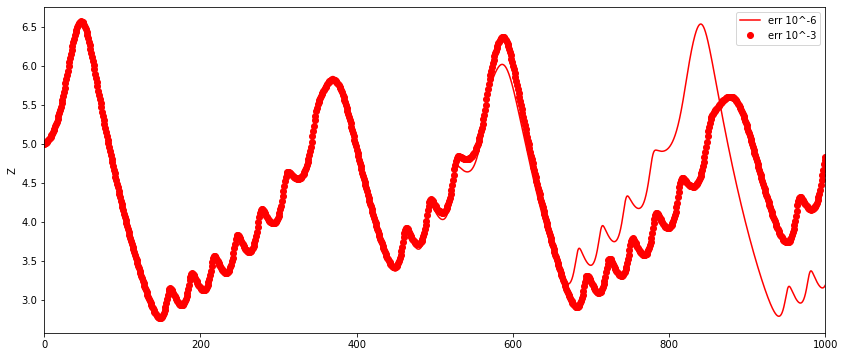

In [38]:
#part f
ec_model_f = model(parameters,initial_conditions_b, 1000, 10**(-3),max_step = 1)
ec_model_f.calc()

fig_f_1 ,axarr_f_1 = plt.subplots()
axarr_f_1.plot(ec_model.time,ec_model.X,'-b',label = 'err 10^-6')
axarr_f_1.plot(ec_model_f.time,ec_model_f.X,'ob',label = 'err10^-3')
axarr_f_1.set_ylabel('X')
axarr_f_1.set_xlim(0,1000)
axarr_f_1.legend()


fig_f_2 ,axarr_f_2 = plt.subplots()
axarr_f_2.plot(ec_model.time,ec_model.Y,'-g',label= 'err 10^-6')
axarr_f_2.plot(ec_model_f.time,ec_model_f.Y,'og',label = 'err 10^-3')
axarr_f_2.set_ylabel('Y')
axarr_f_2.set_xlim(0,1000)
axarr_f_2.legend()


fig_f_3 ,axarr_f_3 = plt.subplots()
axarr_f_3.plot(ec_model.time,ec_model.Z,'-r',label= 'err 10^-6')
axarr_f_3.plot(ec_model_f.time,ec_model_f.Z,'or', label = 'err 10^-3')
axarr_f_3.set_ylabel('Z')
axarr_f_3.set_xlim(0,1000)
axarr_f_3.legend()


As explained above a chaotic system of nonlinear equations can exhibit different behaviour, simply through a change in the integration method, even just a change in the integration step width. For this we changed the allowed error of the integration method from $10^{-6}$ to $10^{-3}$, which naively should not change much. However we can clearly observe a change in the limit cycle of the different species at around $ t\approx 600$ and ongoing.